<a href="https://colab.research.google.com/github/EricUfomadu/About-ME/blob/main/Fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# If running outside Colab, uncomment the next line to install TensorFlow
#%pip install -U tensorflow
# Also needed for plotting
#%pip install -U matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Train:", x_train.shape, y_train.shape, "| Test:", x_test.shape, y_test.shape)

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension
x_train = np.expand_dims(x_train, -1)  # (N, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)

# One-hot labels
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28) (60000,) | Test: (10000, 28, 28) (10000,)


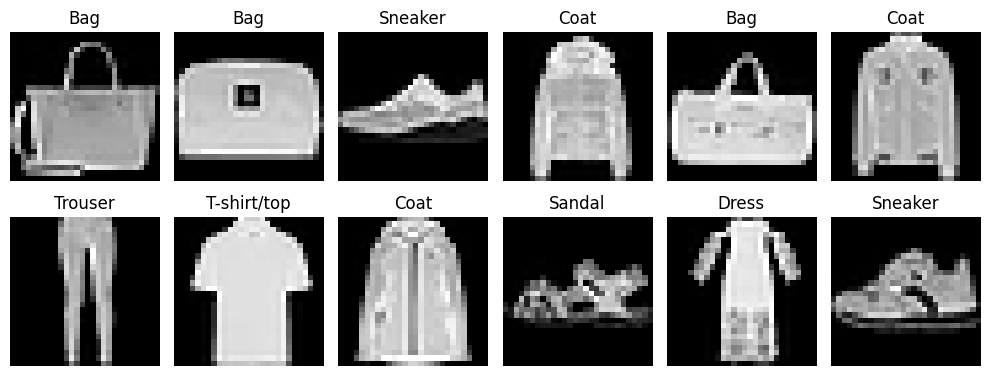

In [3]:

# Show sample images
fig, axes = plt.subplots(2, 6, figsize=(10,4))
for ax, idx in zip(axes.ravel(), np.random.choice(len(x_train), 12, replace=False)):
    ax.imshow(x_train[idx].squeeze(), cmap="gray")
    ax.set_title(class_names[np.argmax(y_train_cat[idx])])
    ax.axis("off")
plt.tight_layout()
plt.show()


In [4]:

# Data augmentation (helps generalization)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)


In [5]:

# Build a simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:

# Train
batch_size = 128
epochs = 10

history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test_cat),
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 163ms/step - accuracy: 0.6136 - loss: 1.0526 - val_accuracy: 0.8044 - val_loss: 0.5142
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 151ms/step - accuracy: 0.7709 - loss: 0.6046 - val_accuracy: 0.8263 - val_loss: 0.4674
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 161ms/step - accuracy: 0.7979 - loss: 0.5413 - val_accuracy: 0.8520 - val_loss: 0.4013
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - accuracy: 0.8124 - loss: 0.4903 - val_accuracy: 0.8540 - val_loss: 0.3903
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 149ms/step - accuracy: 0.8258 - loss: 0.4634 - val_accuracy: 0.8661 - val_loss: 0.3644
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 150ms/step - accuracy: 0.8337 - loss: 0.4418 - val_accuracy: 0.8626 - val_loss: 0.3699
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.8399 - loss: 0.4240 - val_accuracy: 0.8739 - val_loss: 0.3351
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - accuracy: 0.8474 - loss: 0.4065 - val

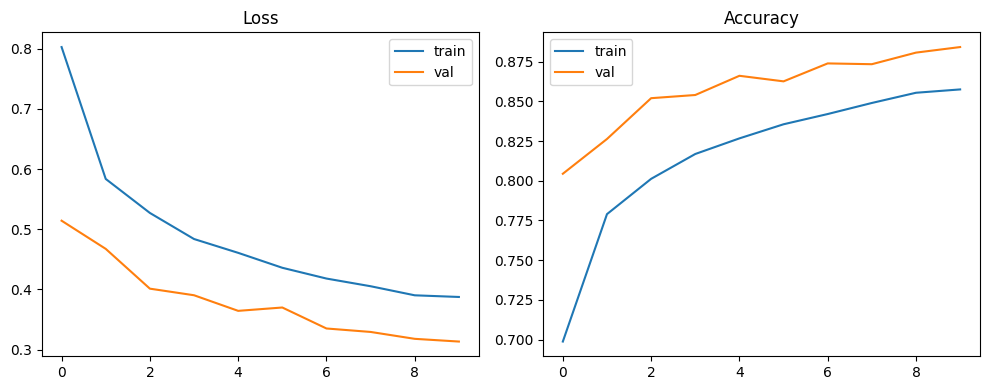

In [7]:

# Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(history.history['loss'], label='train'); plt.plot(history.history['val_loss'], label='val'); plt.title('Loss'); plt.legend()
plt.subplot(1,2,2); plt.plot(history.history['accuracy'], label='train'); plt.plot(history.history['val_accuracy'], label='val'); plt.title('Accuracy'); plt.legend()
plt.tight_layout(); plt.show()


In [8]:

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
y_pred_prob = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Test Accuracy: 0.8842

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.80      0.82      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.84      0.77      0.80      1000
      Sandal       0.95      0.99      0.97      1000
       Shirt       0.62      0.68      0.65      1000
     Sneaker       0.96      0.92      0.94      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



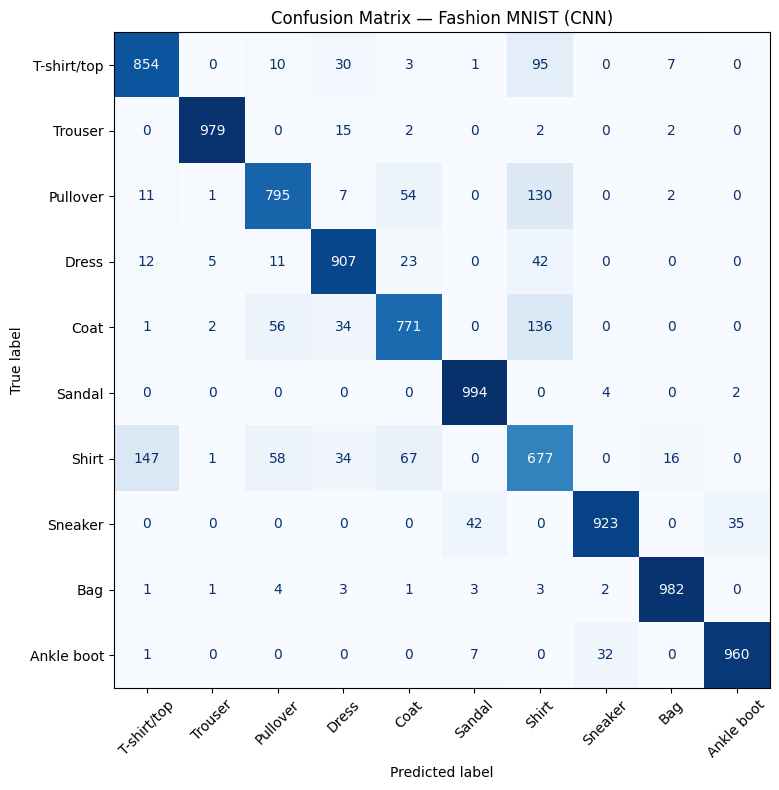

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix — Fashion MNIST (CNN)")
plt.tight_layout(); plt.show()


In [10]:
# Save model (optional)
model.save("fashion_mnist_cnn.h5")
print("Saved: fashion_mnist_cnn.h5")


Saved: fashion_mnist_cnn.h5
